In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [2]:
# LOAD IN FILE
x, sr = librosa.load('E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

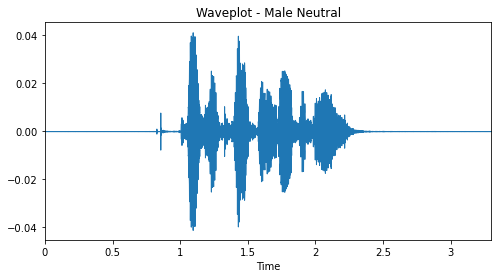

In [4]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

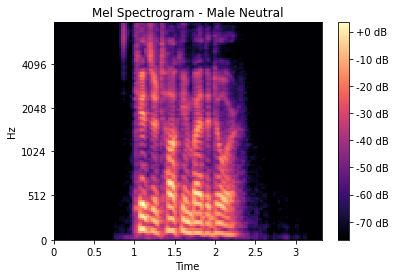

In [3]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

In [8]:
# LOAD IN FILE 
x, sr = librosa.load('E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav')

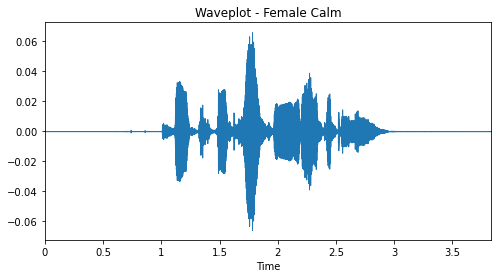

In [10]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

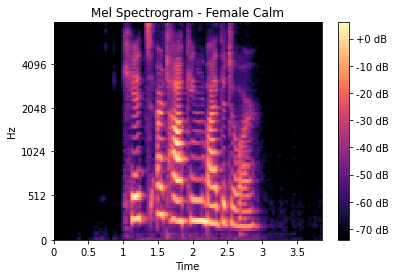

In [11]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

In [3]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "E:\Datasets\RAVDESS/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [4]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [5]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df.to_csv('ravdess.csv')
audio_df

,gender,emotion,actor,path
0,male,neutral,1,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...
1,male,neutral,1,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...
2,male,neutral,1,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...
3,male,neutral,1,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...
4,male,calm,1,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...
...,...,...,...,...
1435,female,surprise,24,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...
1436,female,surprise,24,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...
1437,female,surprise,24,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...
1438,female,surprise,24,E:\Datasets\RAVDESS/audio_speech_actors_01-24/...


In [7]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

,gender,emotion,actor,path
344,female,disgust,6,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_06/03-01-07-01-01-01-06.wav
520,male,fear,9,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-06-02-01-01-09.wav
233,female,surprise,4,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_04/03-01-08-01-01-02-04.wav
398,male,fear,7,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_07/03-01-06-01-02-01-07.wav
1272,female,happy,22,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_22/03-01-03-01-01-01-22.wav
69,female,calm,2,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_02/03-01-02-02-01-02-02.wav
792,female,happy,14,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_14/03-01-03-01-01-01-14.wav
5,male,calm,1,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-02-01.wav
1088,male,calm,19,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_19/03-01-02-02-01-01-19.wav
181,female,neutral,4,E:\Datasets\RAVDESS/audio_speech_actors_01-24/Actor_04/03-01-01-01-01-02-04.wav


<AxesSubplot:>

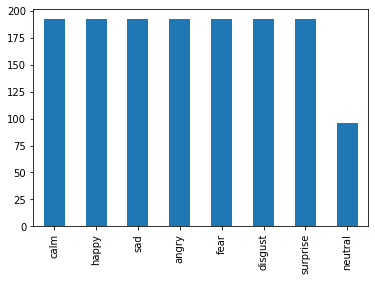

In [8]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [9]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.367455, -76.37206, -76.38477, -76.38477, -76.17391, -75.7191, -75.94153, -75.64262, -75.90894, -75.83096, -75.7507, -74.77977, -72.83129, -71.26305, -66.522675, -66.2235, -70.02048, -72.228935, -72.31369, -73.103096, -73.700745, -74.24736, -72.63008, -70.08872, -71.00686, -71.960075, -64.49295, -45.909077, -40.032604, -41.116264, -43.53601, -40.618973, -35.053967, -32.517487, -32.09255, -32.517563, -33.537037, -33.267624, -35.378643, -40.17928, -42.373196, -43.332584, -42.339584, -40.89039, -37.12334, -35.466946, -33.28547, -32.946716, -32.992203, -33.490017, -35.94524, -41.89631, -47.815334, -50.32318, -45.502876, -38.28941, -38.666992, -41.103245, -41.816746, -42.41458, -41.487278, -39.022465, -35.519356, -33.715797, -33.540745, -34.01699, -34.09233, -32.436264, -31.850286, -33.650314, -38.19356, -42.97809, -45.402485, -45.206005, -44.586697, -45.93698, -45.795696, -40.709064, -37.872944, -38.022907, -38.164814, -39.510433, -41.684795, -42.941948, ...]"
1,"[-75.33552, -75.44532, -75.55403, -75.20395, -75.23053, -75.319374, -75.65379, -75.72004, -75.72004, -75.72004, -75.72004, -75.72004, -75.556015, -75.11806, -75.05926, -75.37063, -75.39123, -75.65184, -75.72004, -75.72004, -75.54712, -75.30135, -75.14379, -75.14993, -75.40678, -72.989136, -65.36421, -66.2162, -71.882805, -61.773552, -55.71258, -54.201565, -59.008545, -65.38085, -71.747086, -73.44503, -74.108345, -75.11359, -75.42259, -73.35681, -71.12248, -71.671295, -72.884895, -57.994675, -46.607414, -42.76556, -42.77662, -44.442123, -43.676537, -39.067398, -35.261017, -33.519928, -32.13304, -31.929556, -32.559227, -35.61177, -41.08098, -44.218506, -45.05884, -44.434963, -43.620224, -41.22991, -38.09882, -35.112507, -33.440567, -33.159184, -33.61412, -33.653328, -33.70163, -36.43076, -42.560383, -47.21645, -50.086777, -51.84662, -41.40655, -36.932037, -37.993717, -39.50256, -40.629517, -38.977478, -37.318024, -38.026073, -36.580463, -32.023193, -30.128971, -30.45188, -30.167238, -29.612186, -31.499273, -37.1459, -43.2208, -46.13312, -44.403187, -42.88003, -44.656715, -46.630924, -43.14435, -40.014732, -38.66212, -37.1802, ...]"
2,"[-75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.13959, -75.07223, -75.15071, -75.15071, -75.15071, -75.15071, -75.09937, -75.15071, -75.15071, -75.15071, -75.10905, -75.09412, -75.15071, -74.92822, -74.1517, -74.19842, -74.51549, -75.11954, -75.10399, -75.13165, -75.15071, -75.15071, -75.14988, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.069016, -74.12102, -73.617714, -74.536026, -74.17392, -73.56244, -72.48515, -73.084854, -49.68085, -39.80159, -36.830807, -35.70478, -34.180237, -31.86353, -30.69315, -30.325382, -30.965012, -30.82406, -30.03375, -28.690538, -28.168774, -28.138542, -29.081396, -30.787271, -33.000286, -37.51421, -41.930313, -44.93863, -44.383247, -41.121105, -40.154667, -39.98905, -39.938183, -41.252922, -40.4535, -37.338863, -35.710594, -36.26966, -36.070953, -36.352516, -36.936497, -38.03057, -39.899944, -40.525482, -41.244236, -41.383785, -40.33425, -38.542667, -39.557934, -40.667435, -37.199425, -32.58196, -32.73895, -33.5526, -37.302288, -43.403584, -39.877724, -35.744804, -34.76521, -34.00362, -33.99902, -34.42435, -35.477673, -38.351665, -41.04027, ...]"
3,"[-75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.243004, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.24528, -75.04568, -74.99168, -75.19989, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -74.34854, -73.92539, -73.56352, -73.27889, -72.94659, -72.36573, -72.77169, -62.66063, -41.765488, -35.625652, -32.697567, -31.232754, -29.58

In [10]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [11]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [12]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.335518,-75.445320,-75.554031,-75.203949,-75.230530,-75.319374,-75.653793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,...,-80.147377,-80.147377,-80.121956,-79.998009,-80.119255,-80.147377,-80.130417,-80.014702,-80.147377,-80.147377


In [13]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [14]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 259)


In [15]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 259)


In [16]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [17]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [18]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [20]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1)

In [21]:
X_train.shape

(1152, 259, 1)

In [22]:
X_test.shape

(288, 259, 1)

In [23]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.052083333333333336

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(128, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 250, 128)          1408      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 241, 128)          163968    
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 30, 128)           0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 2, 128)           

In [46]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/40
36/36 [==============================] - ETA: 0s - loss: 2.5425 - accuracy: 0.2300
Epoch 00001: val_accuracy improved from -inf to 0.26389, saving model to best_initial_model.hdf5
36/36 [==============================] - 6s 168ms/step - loss: 2.5425 - accuracy: 0.2300 - val_loss: 2.0478 - val_accuracy: 0.2639
Epoch 2/40
36/36 [==============================] - ETA: 0s - loss: 1.9504 - accuracy: 0.2543
Epoch 00002: val_accuracy improved from 0.26389 to 0.29514, saving model to best_initial_model.hdf5
36/36 [==============================] - 5s 144ms/step - loss: 1.9504 - accuracy: 0.2543 - val_loss: 1.8649 - val_accuracy: 0.2951
Epoch 3/40
36/36 [==============================] - ETA: 0s - loss: 1.8336 - accuracy: 0.2474
Epoch 00003: val_accuracy improved from 0.29514 to 0.30208, saving model to best_initial_model.hdf5
36/36 [==============================] - 6s 153ms/step - loss: 1.8336 - accuracy: 0.2474 - val_loss: 1.7746 - val_accuracy: 0.3021
Epoch 4/40
36/36 [==========

Epoch 28/40
36/36 [==============================] - ETA: 0s - loss: 1.4094 - accuracy: 0.4601
Epoch 00028: val_accuracy did not improve from 0.47569
36/36 [==============================] - 6s 162ms/step - loss: 1.4094 - accuracy: 0.4601 - val_loss: 1.4552 - val_accuracy: 0.4479
Epoch 29/40
36/36 [==============================] - ETA: 0s - loss: 1.4254 - accuracy: 0.4688
Epoch 00029: val_accuracy did not improve from 0.47569
36/36 [==============================] - 5s 149ms/step - loss: 1.4254 - accuracy: 0.4688 - val_loss: 1.4413 - val_accuracy: 0.4514
Epoch 30/40
36/36 [==============================] - ETA: 0s - loss: 1.3909 - accuracy: 0.4818
Epoch 00030: val_accuracy improved from 0.47569 to 0.47917, saving model to best_initial_model.hdf5
36/36 [==============================] - 5s 150ms/step - loss: 1.3909 - accuracy: 0.4818 - val_loss: 1.4195 - val_accuracy: 0.4792
Epoch 31/40
36/36 [==============================] - ETA: 0s - loss: 1.3887 - accuracy: 0.4852
Epoch 00031: val_

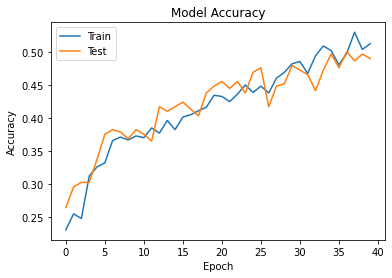

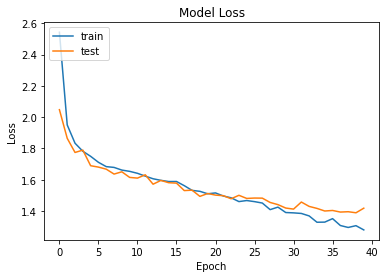

In [47]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

In [43]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 22ms/step - loss: 1.3656 - accuracy: 0.5174
Loss of the model is -  1.3656028509140015
9/9 [==============================] - 0s 22ms/step - loss: 1.3656 - accuracy: 0.5174
Accuracy of the model is -  51.73611044883728 %


In [37]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,calm
141,surprise,surprise
142,neutral,sad
143,sad,sad
144,fear,surprise
145,sad,happy
146,disgust,disgust
147,angry,angry
148,surprise,angry
149,angry,surprise


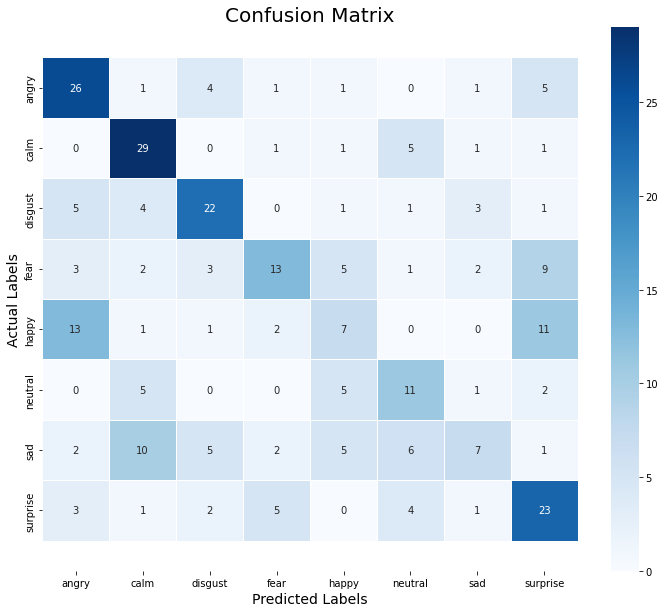

In [38]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [39]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.50      0.67      0.57        39
        calm       0.55      0.76      0.64        38
     disgust       0.59      0.59      0.59        37
        fear       0.54      0.34      0.42        38
       happy       0.28      0.20      0.23        35
     neutral       0.39      0.46      0.42        24
         sad       0.44      0.18      0.26        38
    surprise       0.43      0.59      0.50        39

    accuracy                           0.48       288
   macro avg       0.47      0.47      0.45       288
weighted avg       0.47      0.48      0.46       288

